In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import sys
import subprocess
#to install cvxopt 
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'cvxopt'])
import cvxopt

In [2]:
path1 = "Data1.xlsx"
path2 = "Data2.xlsx"

# Q1 - Data 1 Visualization

In [3]:
df1 = pd.read_excel(path1)

In [4]:
#Data1
df1

,Variable 1,Variable 2,Class
0,1.97430,4.6057,1
1,2.28530,3.8689,1
2,2.98810,4.5751,1
3,2.94200,3.5619,1
4,3.58720,2.8660,1
5,4.02500,3.2037,1
6,3.39140,3.4391,1
7,3.92130,4.1861,1
8,2.79220,4.0531,1
9,2.56180,4.6262,1


In [5]:
#Maximum and Minimum values of Variable 1 in Data1 
print(df1['Variable 1'].max(), " ", df1['Variable 1'].min())

4.0249999999999995   0.77615


In [6]:
#Maximum and Minimum values of Variable 2 in Data1 
print(df1['Variable 2'].max(), " ", df1['Variable 2'].min())

4.6262   1.6277


In [7]:
#Feature matrix for Data1
X1 = df1.drop(['Class'], axis = 1).to_numpy()
X1.shape

(50, 2)

In [8]:
#Class matrix for Data1
Y11 = df1.drop(['Variable 1', 'Variable 2'], axis = 1).to_numpy()
Y1 = np.reshape(Y11, (X1.shape[0],))
Y1.shape

(50,)

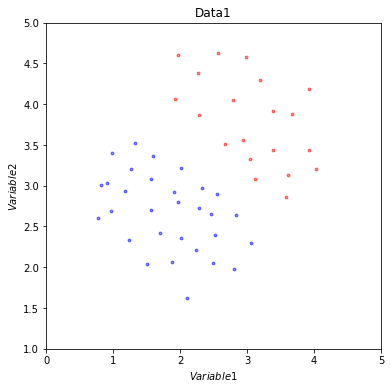

In [9]:
#Scatter Plot for Data1
fig = plt.figure(figsize = (6, 6))
plt.scatter(*X1[Y1 == (-1)].T, s = 8, color = "blue", alpha = 0.5)
plt.scatter(*X1[Y1 == 1].T, s = 8, color = "red", alpha = 0.5)
plt.xlim(0.0, 5.0)
plt.ylim(1.0, 5.0)
plt.ylabel(r'$Variable 2$')
plt.xlabel(r'$Variable 1$')
plt.title("Data1") 
#plt.savefig("C:\Me\sem6\cll788\A3\Data1_scatter.jpeg")
plt.show()

# Q2 - SVM Implementation on Data 1

In [10]:
#tn
tn = Y1
tn = np.reshape(tn, (tn.shape[0], 1))
tn.shape

(50, 1)

In [11]:
#H = tn*tm*xn.T*xm
#P parameter for cvxopt solver
a1 = tn*X1
a2 = a1.T
H = np.dot(a1, a2)

In [12]:
size1 = X1.shape[0]
#q parameter for cvxopt solver
q = -1*np.ones((size1, 1))

In [13]:
#G parameter for cvxopt solver
G = -1*np.eye(size1)

In [14]:
#h parameter for cvxopt solver
#for this case we have h as a 0 matrix
h = np.zeros((size1, 1))

In [15]:
#A parameter for cvxopt solver
A = tn.reshape(1, -1)
A = A.astype('float')

In [16]:
#b parameter for cvxopt solver
b_cvx = np.zeros(1)

In [17]:
#cvxopt solver for quadratic optimization
sol = cvxopt.solvers.qp(cvxopt.matrix(H), cvxopt.matrix(q), cvxopt.matrix(G), cvxopt.matrix(h), cvxopt.matrix(A), 
                        cvxopt.matrix(b_cvx))

     pcost       dcost       gap    pres   dres
 0: -9.8635e+00 -1.8817e+01  1e+02  1e+01  2e+00
 1: -1.5021e+01 -1.0777e+01  2e+01  2e+00  3e-01
 2: -1.2100e+01 -9.6312e+00  1e+01  9e-01  1e-01
 3: -8.2568e+00 -8.0984e+00  2e+00  1e-01  2e-02
 4: -7.9274e+00 -7.9429e+00  4e-02  1e-03  2e-04
 5: -7.9397e+00 -7.9399e+00  4e-04  1e-05  2e-06
 6: -7.9398e+00 -7.9398e+00  4e-06  1e-07  2e-08
 7: -7.9398e+00 -7.9398e+00  4e-08  1e-09  2e-10
Optimal solution found.


In [18]:
#lambda values
lambdas = np.array(sol['x'])

In [19]:
#weights
w = np.dot(X1.T, (tn*lambdas))
w

array([[2.54140955],
       [3.0693502 ]])

In [20]:
#tolerance used to filter values with lambda>0
tolerance = 0.000001

In [21]:
#filteration of points with lambda>tolerance 
Ns = 0
xs = []
ys = []
for i in range(lambdas.shape[0]):
    if lambdas[i]>=tolerance:
        Ns = Ns + 1
        xs.append(X1[i])
        ys.append(tn[i])
xs = np.array(xs)
ys = np.array(ys)
print(Ns)
print(xs.shape)
print(ys.shape)

3
(3, 2)
(3, 1)


In [22]:
bn = ys - np.dot(xs, w) 
bn.shape

(3, 1)

In [23]:
#bias term
b = 0
for i in range(bn.shape[0]):
    b = b + bn[i][0]
b = [b/Ns]
print(b)

[-16.372343517060063]


In [24]:
#prediction function y = w.T*x + b
def predict1(w, b, x):
    
    m, n = x.shape
    y = []
    
    for i in range(m):
        y.append(((w[0]*x[i][0] + w[1]*x[i][1] + b)))
                 
    yn = np.array(y)
                 
    return yn

In [25]:
#predicted values
y_p = predict1(w, b, X1)
y_p.shape

(50, 1)

In [26]:
#accuracy computation 
count = 0
for i in range(y_p.shape[0]):
    if y_p[i][0]>=1:
        y_p[i] = 1
    else:
        y_p[i] = -1
    if tn[i] == y_p[i]:
        count = count + 1
print("accuracy = ", (count/y_p.shape[0])*100, "%")

accuracy =  98.0 %


In [27]:
y_p = y_p.reshape(y_p.shape[0], )

In [28]:
#intercept of decision function
c = -b[0]/w[1][0]
c

5.3341399416933974

In [29]:
#slope of decisin function
slope = -w[0][0]/w[1][0]
slope

-0.827995954766148

In [30]:
#intercepts for line passing through support vectors
c11 = c + math.sqrt((1 + slope*slope))/math.sqrt((w[0][0]*w[0][0] + w[1][0]*w[1][0]))
c12 = c - math.sqrt((1 + slope*slope))/math.sqrt((w[0][0]*w[0][0] + w[1][0]*w[1][0]))
(c11, c12)

(5.659941799938993, 5.008338083447802)

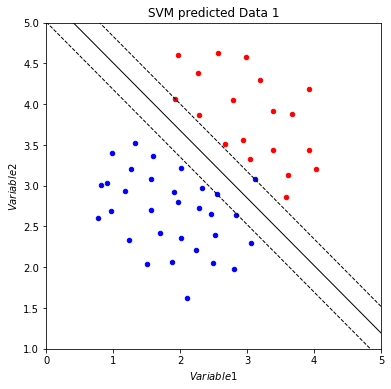

In [31]:
#scatter plot with decision boundary on predicted values
fig = plt.figure(figsize = (6, 6))
xl = np.array([0.0, 5.0])
yl = slope*xl + c
yl1 = slope*xl + c11
yl2 = slope*xl + c12
plt.plot(xl, yl, "k", lw = 1, ls = "-")
plt.plot(xl, yl1, "k", lw = 1, ls = "--")
plt.plot(xl, yl2, "k", lw = 1, ls = "--")

plt.scatter(*X1[y_p == (-1)].T, s = 20, color = "blue", alpha = 1.0)
plt.scatter(*X1[y_p == 1].T, s = 20, color = "red", alpha = 1.0)
plt.xlim(0.0, 5.0)
plt.ylim(1.0, 5.0)
plt.ylabel(r'$Variable 2$')
plt.xlabel(r'$Variable 1$')
plt.title("SVM predicted Data 1") 
#plt.savefig("C:\Me\sem6\cll788\A3\Data1_svm.jpeg")
plt.show()

# Q3 - Modified SVM on Data 2 

In [32]:
df2 = pd.read_excel(path2)

In [33]:
#Data2
df2

,Variable 1,Variable 2,Class
0,1.9743,4.6057,1
1,2.2853,3.8689,1
2,2.9881,4.5751,1
3,2.9421,3.5619,1
4,3.5872,2.8669,1
5,4.0251,3.2037,1
6,2.2134,2.8541,1
7,3.3914,3.4391,1
8,3.9213,4.1861,1
9,2.7922,4.0531,1


In [34]:
#Maximum and Minimum values of Variable 1 in Data2
print(df2['Variable 1'].max(), " ", df2['Variable 1'].min())

4.3111   0.0864


In [35]:
#Maximum and Minimum values of Variable 1 in Data2
print(df2['Variable 2'].max(), " ", df2['Variable 2'].min())

4.6262   1.6277


In [36]:
#Feature matrix for Data2
X2 = df2.drop(['Class'], axis = 1).to_numpy()
X2.shape

(55, 2)

In [37]:
#Class matrix for Data2
Y21 = df2.drop(['Variable 1', 'Variable 2'], axis = 1).to_numpy()
Y2 = np.reshape(Y21, (X2.shape[0],))
Y2.shape

(55,)

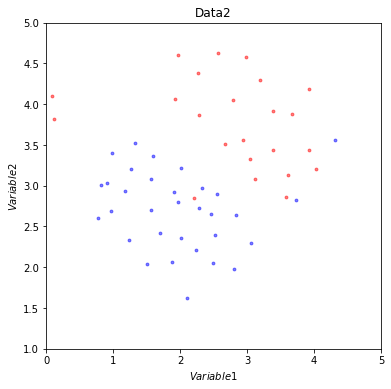

In [38]:
#Scatter plot for Data2
fig = plt.figure(figsize = (6, 6))
plt.scatter(*X2[Y2 == (-1)].T, s = 8, color = "blue", alpha = 0.5)
plt.scatter(*X2[Y2 == 1].T, s = 8, color = "red", alpha = 0.5)
plt.xlim(0.0, 5.0)
plt.ylim(1.0, 5.0)
plt.ylabel(r'$Variable 2$')
plt.xlabel(r'$Variable 1$')
plt.title("Data2") 
#plt.savefig("C:\Me\sem6\cll788\A3\Data2_scatter.jpeg")
plt.show()

In [39]:
#Prediction function y = w.T*x + b
def predict2(w, b, x):
    
    m, n = x.shape
    y = []
    
    for i in range(m):
        y.append(((w[0]*x[i][0] + w[1]*x[i][1] + b)))
                 
    yn = np.array(y)
                 
    return yn

In [40]:
#Different values of C 
C = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [41]:
#tn for Data2
tn2 = Y2
tn2 = np.reshape(tn2, (tn2.shape[0], 1))
tn2.shape

(55, 1)

In [42]:
#Weight, Bias, Accuracy and Prediction matrices for different values of C
W = []
B = []
Accuracy = []
Y_P = []

In [43]:
#same code as for Data1 but for loop used to solve for different values of C
a21 = tn2*X2
a22 = a21.T
H2 = np.dot(a21, a22)
size2 = X2.shape[0]
q2 = -1*np.ones((size2, 1))
G2 = np.vstack((-1*np.eye(size2), np.eye(size2)))
for c in C:
    h2 = np.hstack((np.zeros((size2)), np.ones((size2))*c))
    A2 = tn2.reshape(1, -1)
    A2 = A2.astype('float')
    b2_cvx = np.zeros(1)
    sol2 = cvxopt.solvers.qp(cvxopt.matrix(H2), cvxopt.matrix(q2), cvxopt.matrix(G2), cvxopt.matrix(h2), cvxopt.matrix(A2), 
                        cvxopt.matrix(b2_cvx))
    lambdas2 = np.array(sol2['x'])
    w2 = np.dot(X2.T, (tn2*lambdas2))
    tolerance2 = 0.0001
    Ns2 = 0
    xs2 = []
    ys2 = []
    for i in range(lambdas2.shape[0]):
        if lambdas2[i]>=tolerance2:
            Ns2 = Ns2 + 1
            xs2.append(X2[i])
            ys2.append(tn2[i])
    xs2 = np.array(xs2)
    ys2 = np.array(ys2)
    bn2 = ys2 - np.dot(xs2, w2) 
    b2 = 0
    for i in range(bn2.shape[0]):
        b2 = b2 + bn2[i][0]
    b2 = [b2/Ns2]
    W.append(w2)
    B.append(b2)
    y_p2 = predict2(w2, b2, X2)
    Y_P.append(y_p2)
    count2 = 0
    for i in range(y_p2.shape[0]):
        if y_p2[i]>=1:
            y_p2[i] = 1
        else:
            y_p2[i] = -1
            
        if tn2[i] == y_p2[i]:
            count2 = count2 + 1
    accuracy = (count2/y_p2.shape[0])*100
    Accuracy.append(accuracy)

     pcost       dcost       gap    pres   dres
 0: -1.1037e+01 -1.5711e+00  4e+02  2e+01  1e-14
 1: -8.6740e-01 -1.5053e+00  1e+01  5e-01  1e-14
 2: -3.8906e-01 -1.1627e+00  8e-01  4e-03  1e-15
 3: -4.0580e-01 -5.0648e-01  1e-01  5e-04  7e-16
 4: -4.1626e-01 -4.4803e-01  3e-02  1e-04  4e-16
 5: -4.2540e-01 -4.3068e-01  5e-03  8e-06  5e-16
 6: -4.2696e-01 -4.2856e-01  2e-03  1e-06  5e-16
 7: -4.2751e-01 -4.2774e-01  2e-04  1e-07  5e-16
 8: -4.2760e-01 -4.2764e-01  4e-05  1e-08  5e-16
 9: -4.2762e-01 -4.2762e-01  5e-07  1e-10  4e-16
10: -4.2762e-01 -4.2762e-01  5e-09  1e-12  5e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1980e+01 -1.2049e+01  4e+02  2e+01  1e-14
 1: -2.1122e+00 -1.1472e+01  1e+01  2e-01  1e-14
 2: -2.1269e+00 -3.1536e+00  1e+00  1e-03  3e-15
 3: -2.5606e+00 -2.7559e+00  2e-01  2e-04  3e-15
 4: -2.6672e+00 -2.6839e+00  2e-02  1e-05  4e-15
 5: -2.6756e+00 -2.6759e+00  3e-04  2e-07  4e-15
 6: -2.6758e+00 -2.6758e+00  3e-06  2e-09  3e-1

In [44]:
for i in range(len(Accuracy)):
    print("accuracy for", C[i], "=", Accuracy[i])

accuracy for 0.01 = 58.18181818181818
accuracy for 0.1 = 70.9090909090909
accuracy for 1 = 81.81818181818183
accuracy for 10 = 83.63636363636363
accuracy for 100 = 85.45454545454545
accuracy for 1000 = 85.45454545454545
accuracy for 10000 = 89.0909090909091
accuracy for 100000 = 90.9090909090909
accuracy for 1000000 = 90.9090909090909
accuracy for 10000000 = 85.45454545454545


In [45]:
for i in range(len(Y_P)):
    Y_P[i] = Y_P[i].reshape(Y_P[i].shape[0], )

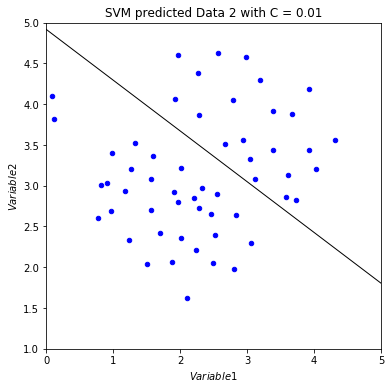

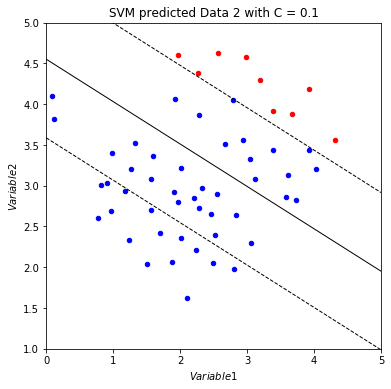

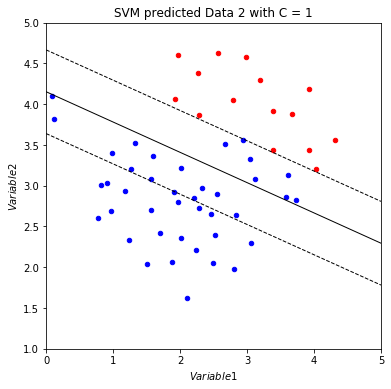

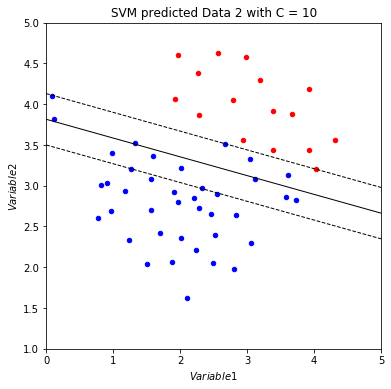

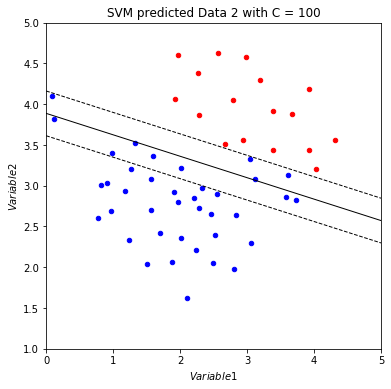

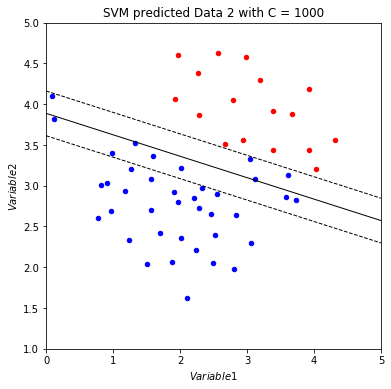

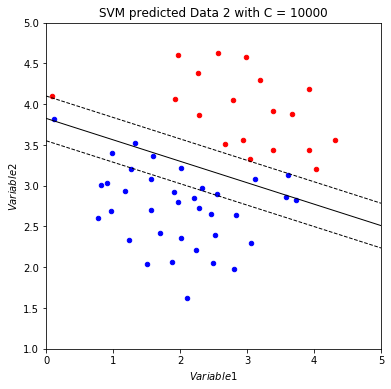

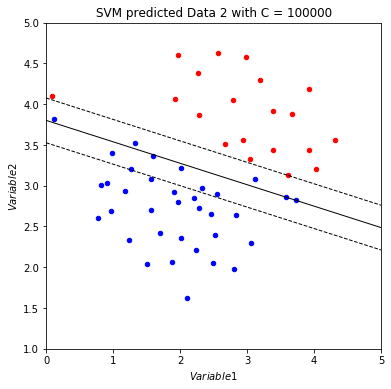

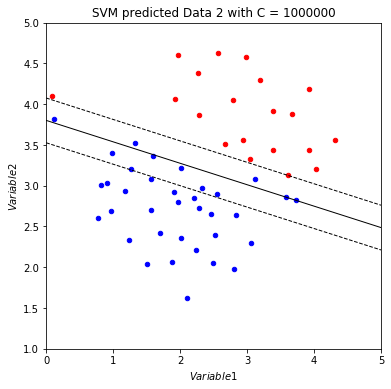

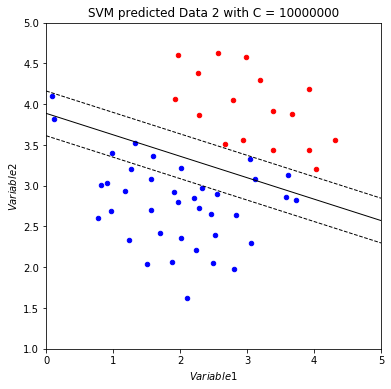

In [46]:
#scatter plot with decision boundary on predicted values for different values of C
for i in range(len(C)):
    fig = plt.figure(figsize = (6, 6))
    c = -B[i][0]/W[i][1][0]
    slope = -W[i][0][0]/W[i][1][0]
    c11 = c + math.sqrt((1 + slope*slope))/math.sqrt((W[i][0][0]*W[i][0][0] + W[i][1][0]*W[i][1][0]))
    c12 = c - math.sqrt((1 + slope*slope))/math.sqrt((W[i][0][0]*W[i][0][0] + W[i][1][0]*W[i][1][0]))
    yl = slope*xl + c
    yl1 = slope*xl + c11
    yl2 = slope*xl + c12
    plt.plot(xl, yl, "k", lw = 1, ls = "-")
    plt.plot(xl, yl1, "k", lw = 1, ls = "--")
    plt.plot(xl, yl2, "k", lw = 1, ls = "--")

    plt.scatter(*X2[Y_P[i] == (-1)].T, s = 20, color = "blue", alpha = 1.0)
    plt.scatter(*X2[Y_P[i] == 1].T, s = 20, color = "red", alpha = 1.0)
    plt.xlim(0.0, 5.0)
    plt.ylim(1.0, 5.0)
    plt.ylabel(r'$Variable 2$')
    plt.xlabel(r'$Variable 1$')
    plt.title("SVM predicted Data 2 with C = " + str(C[i])) 
    #image_name = "C:\Me\sem6\cll788\A3\Data2_scatter" + str(C[i]) + ".jpeg"
    #plt.savefig(image_name)
    plt.show()